In [1]:
!python --version

Python 3.10.12


# 🐍 Importando bibliotecas e verificando suas versões

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

HEIGHT, WIDTH = 10, 4

In [3]:
libraries = [pd, matplotlib, sns]

for _ in libraries:
  print(f'{_.__name__}: {_.__version__}')

pandas: 2.0.3
matplotlib: 3.7.1
seaborn: 0.13.1


# 🔃 Baixando os arquivos .csv e convertendo-os para dataframes

In [4]:
common = ''

caminho_customers = f'{common}/olist-customers-dataset.csv'
caminho_geolocation = f'{common}/olist-geolocation-dataset.csv'
caminho_order_items = f'{common}/olist-order-items-dataset.csv'
caminho_order_payments = f'{common}/olist-order-payments-dataset.csv'
caminho_order_reviews = f'{common}/olist-order-reviews-dataset.csv'
caminho_orders = f'{common}/olist-orders-dataset.csv'
caminho_products = f'{common}/olist-products-dataset.csv'
caminho_sellers = f'{common}/olist-sellers-dataset.csv'

In [5]:
df_customers = pd.read_csv(caminho_customers)
df_geolocation = pd.read_csv(caminho_geolocation)
df_order_items = pd.read_csv(caminho_order_items)
df_order_payments = pd.read_csv(caminho_order_payments)
df_order_reviews = pd.read_csv(caminho_order_reviews)
df_orders = pd.read_csv(caminho_orders)
df_products = pd.read_csv(caminho_products)
df_sellers = pd.read_csv(caminho_sellers)

# 🕵️ Verificando o conteúdo das colunas

In [6]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [7]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [8]:
df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [9]:
df_order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [10]:
df_order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [11]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [12]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [13]:
df_sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

# 🗄️ Como os dataframes estão relacionados

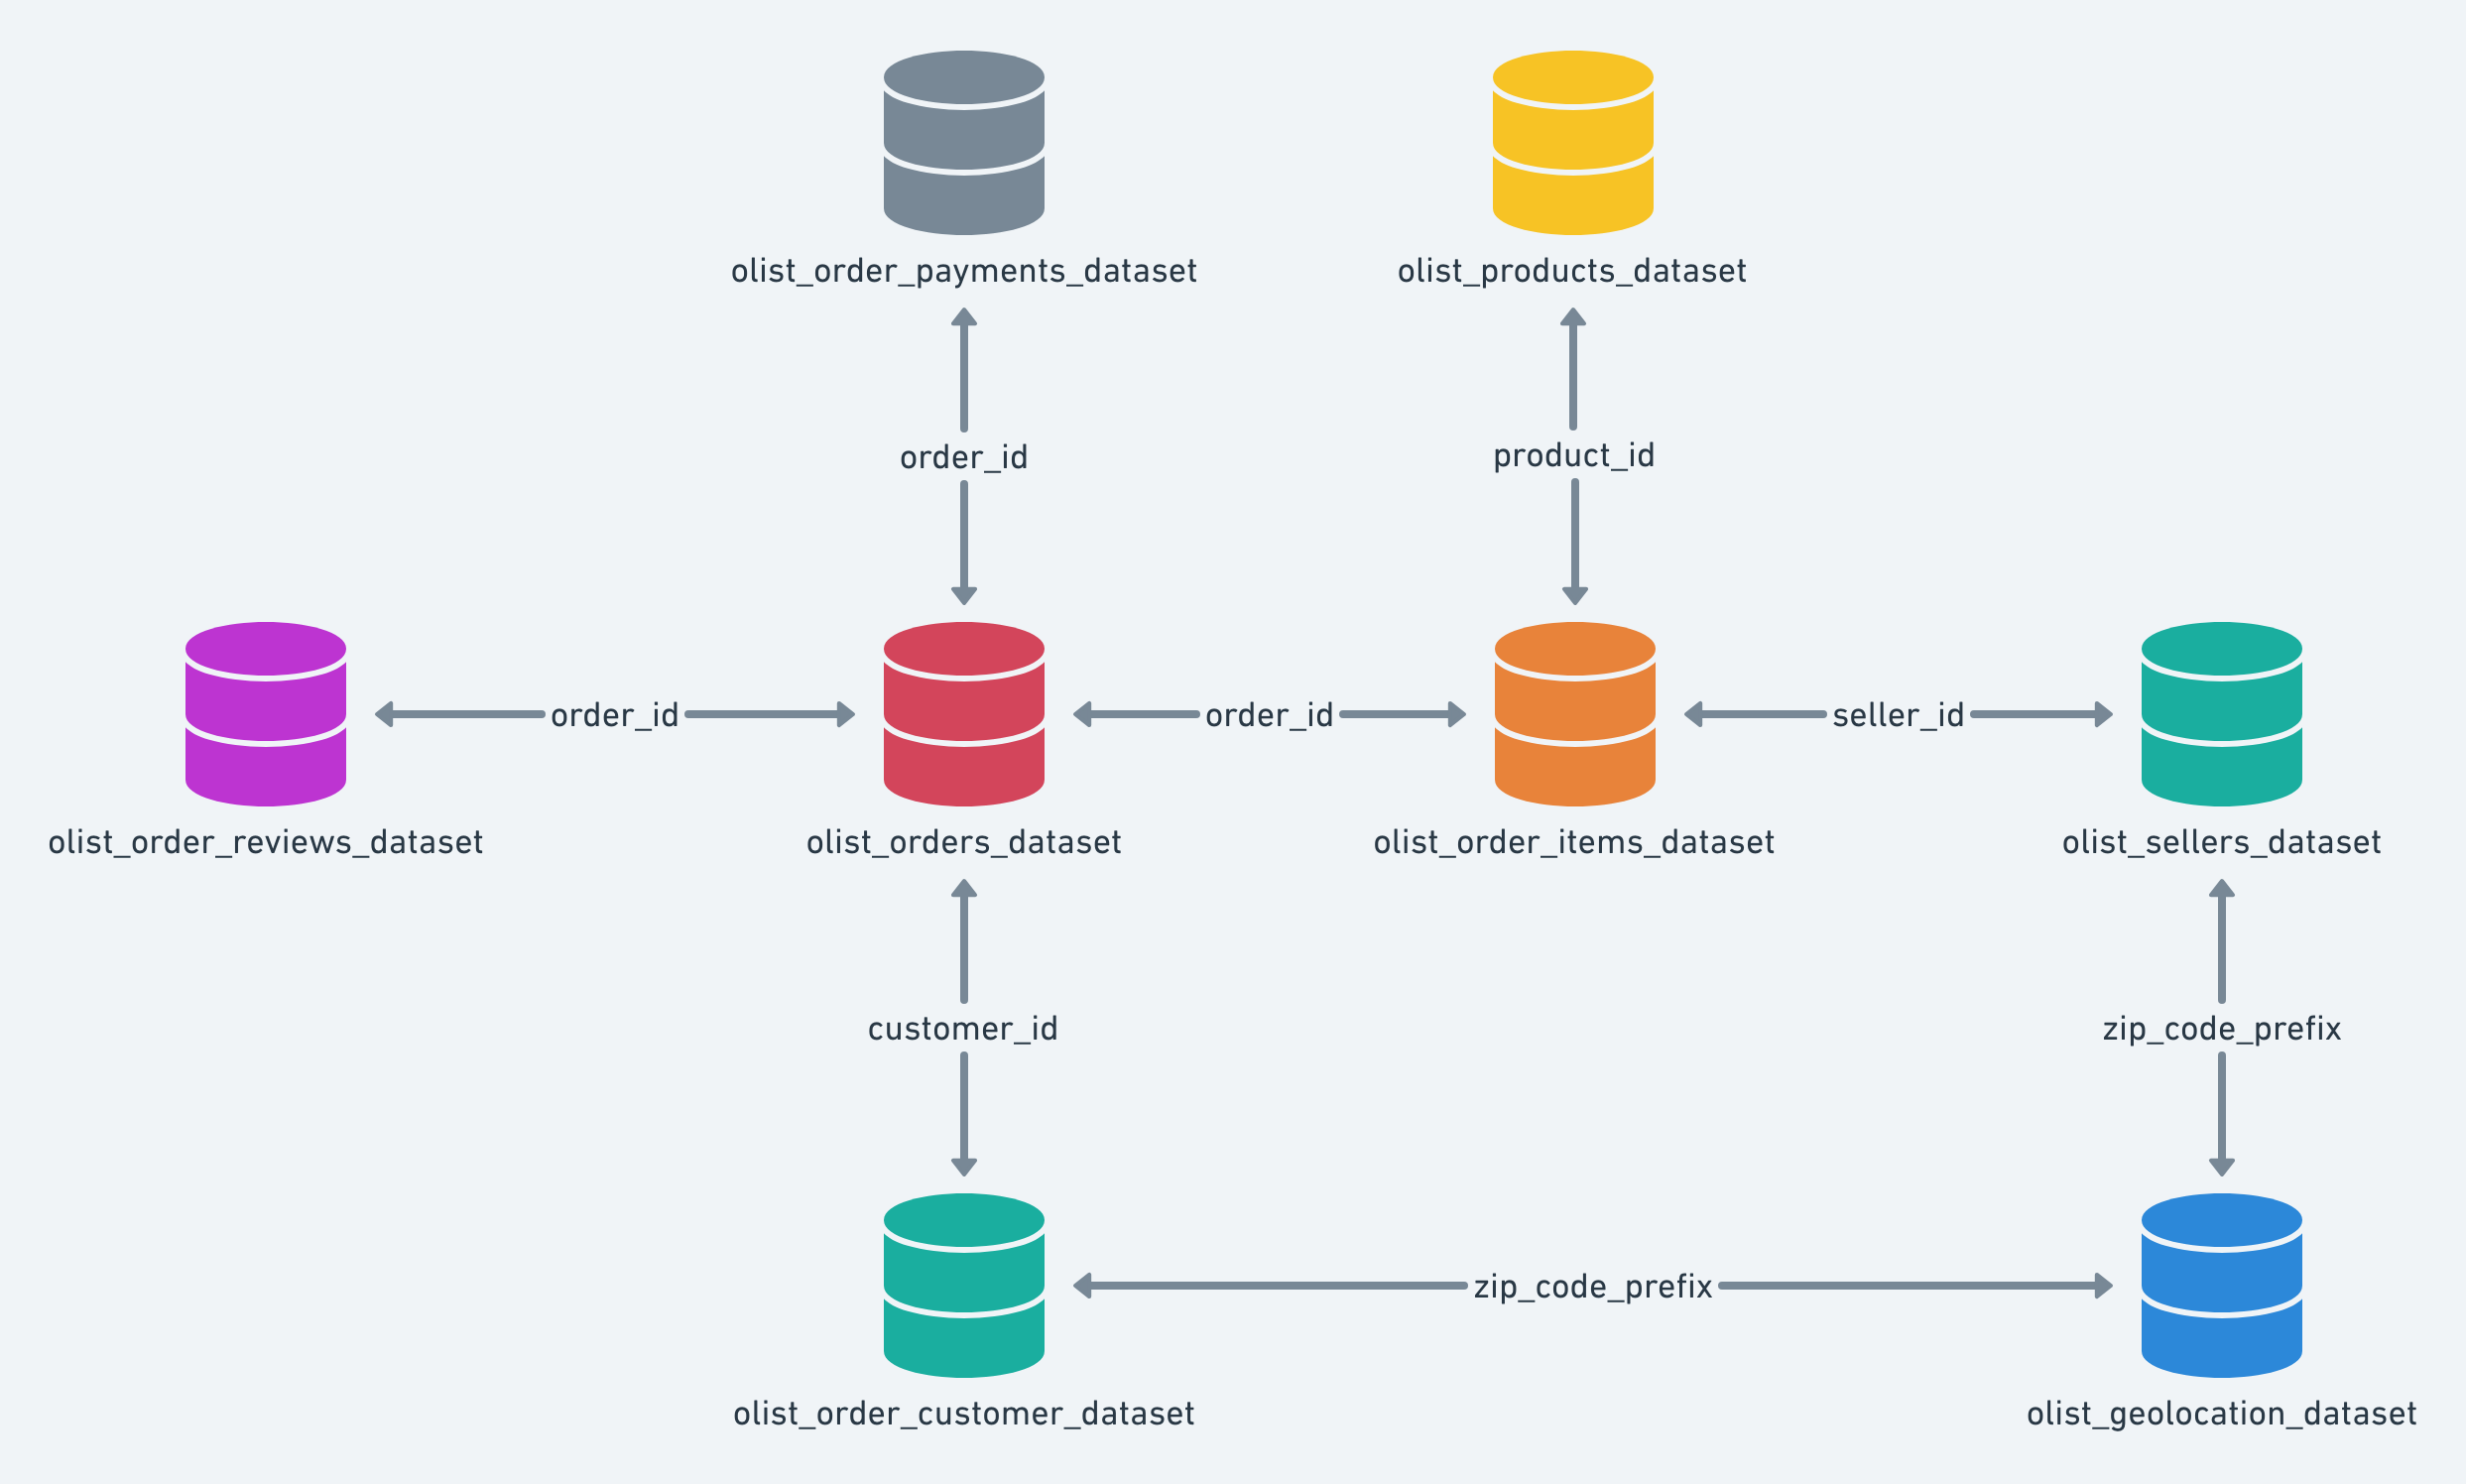

# 💳 **Métodos de Pagamento**: Quais foram os métodos de pagamento mais frequentemente utilizados pelos clientes?

---
Encontrando os valores

In [14]:
métodos_de_pagamento = df_order_payments.payment_type.value_counts()

---
Plot

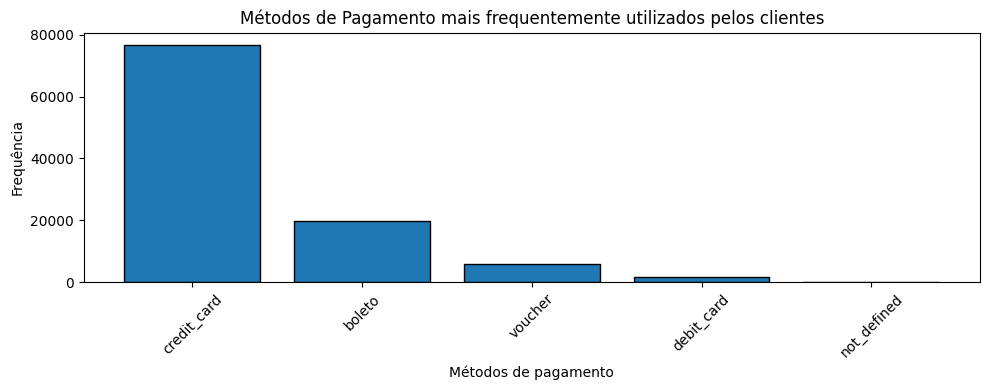

In [15]:
plt.figure(figsize=(HEIGHT, WIDTH))
plt.bar(métodos_de_pagamento.head(10).index,
        métodos_de_pagamento.head(10).values, edgecolor='black')
plt.title('Métodos de Pagamento mais frequentemente utilizados pelos clientes')
plt.xlabel('Métodos de pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
Decisões estratégicas baseadas nos resultados

***Insight princial:***  Deve-se estabelecer parcerias estratégicas com bandeiras de cartão de crédito pode potencializar benefícios exclusivos para clientes, impulsionando a lealdade e a visibilidade da marca, ao mesmo tempo que abre caminhos para o crescimento sustentável e a lucratividade a longo prazo da empresa.

1. **Parceria Estratégica com Bandeiras de Cartão de Crédito:**
  
  Dada a predominância do cartão de crédito como o método de pagamento mais utilizado pelos clientes, é recomendável estabelecer uma colaboração estratégica mais próxima com as principais bandeiras de cartão de crédito.

2. **Oferta de Benefícios Exclusivos aos Clientes:**

  Esta parceria pode ser aproveitada para oferecer benefícios exclusivos aos clientes, como descontos especiais e programas de fidelidade. Tais benefícios têm como objetivo aprimorar a experiência do cliente e fortalecer a confiança na marca.

3. **Exploração de Oportunidades de Marketing Conjunto:**

  A iniciativa de parceria com as principais bandeiras de cartão de crédito pode abrir oportunidades de marketing conjunto. Isso inclui campanhas promocionais conjuntas, aumentando assim a visibilidade da empresa e atraindo novos clientes.

4. **Objetivo de Crescimento a Longo Prazo:**

  Essas decisões são orientadas não apenas para aumentar o conforto e a satisfação dos clientes atuais, mas também para impulsionar o crescimento e a lucratividade a longo prazo da empresa.

---
Métrica

Taxa de utilização de métodos de pagamento a partir da tomada de decisão

In [16]:
métodos_de_pagamento

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [17]:
métrica_métodos_de_pagamento = pd.merge(
    df_order_payments, df_orders, on='order_id', how='inner')

In [18]:
métrica_métodos_de_pagamento.order_purchase_timestamp = pd.to_datetime(
    métrica_métodos_de_pagamento.order_purchase_timestamp)

In [19]:
métrica_métodos_de_pagamento['year'] = métrica_métodos_de_pagamento.order_purchase_timestamp.dt.year

In [20]:
métrica_métodos_de_pagamento = métrica_métodos_de_pagamento[
    métrica_métodos_de_pagamento.year == 2025].payment_type.value_counts()
métrica_métodos_de_pagamento

Series([], Name: count, dtype: int64)

# 📌 **Receita por Estado**: De quais estados do Brasil veio a maior parte da receita gerada pelas vendas de produtos?

---
Encontrando os valores

In [21]:
receita_por_estado = pd.merge(
    df_orders, df_customers, on='customer_id', how='inner')

In [22]:
receita_por_estado = pd.merge(
    receita_por_estado, df_order_payments, on='order_id', how='inner')

In [23]:
df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [24]:
filtro = (receita_por_estado.order_status != 'canceled')

In [25]:
colunas = ['customer_state', 'payment_value']

In [26]:
métrica_receita_por_estado = receita_por_estado.copy()

In [27]:
receita_por_estado = receita_por_estado[filtro][colunas].groupby(
    'customer_state')

In [28]:
receita_por_estado = receita_por_estado['payment_value'].sum(
).sort_values(ascending=False)

In [29]:
top_5_estados = [estado for estado in receita_por_estado.head().index]
top_5_estados

['SP', 'RJ', 'MG', 'RS', 'PR']

---
Plot

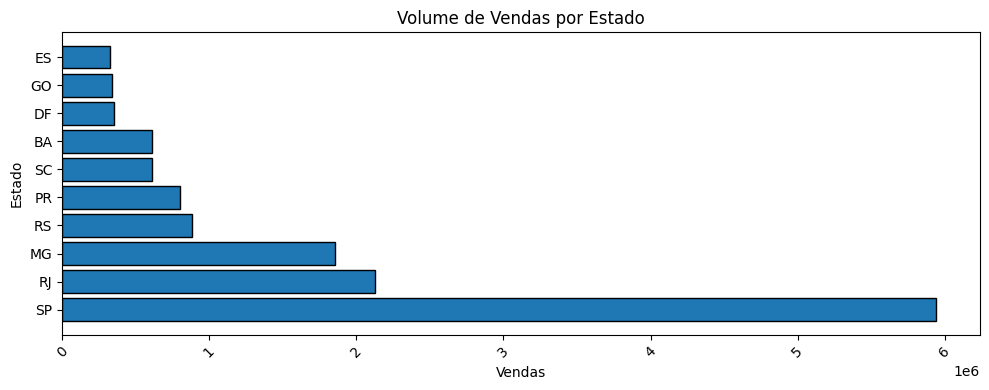

In [30]:
plt.figure(figsize=(HEIGHT, WIDTH))
plt.barh(receita_por_estado.head(10).index,
         receita_por_estado.head(10).values, edgecolor='black')
plt.title('Volume de Vendas por Estado')
plt.xlabel('Vendas')
plt.ylabel('Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
Decisões estratégicas baseadas nos resultados

***Insight princial:***  Deve-se concentrar esforços em São Paulo e manter presença em MG, PR, RJ, e SC otimiza recursos e capitaliza sobre áreas de alto desempenho, impulsionando crescimento sustentável e eficaz a longo prazo pela maximização do potencial de mercado nestas regiões-chave.



1. **Foco Estratégico nos Estados com Maior Volume de Vendas:**

  Com base na análise dos dados, que revelam os estados com o maior volume de vendas de produtos por vendedores, é sugerido que a empresa direcione seus esforços estratégicos para fortalecer sua presença nessas regiões-chave.

2. **Priorização de São Paulo e Manutenção da Presença em Estados-Chave:**

  Recomenda-se que a empresa concentre seus esforços em São Paulo (SP), que representa a maior parte das vendas. Ao mesmo tempo, é importante manter uma forte presença em Minas Gerais (MG), Paraná (PR), Rio de Janeiro (RJ) e Santa Catarina (SC), que também contribuem significativamente para o volume total de vendas.

3. **Otimização de Recursos para Crescimento Sustentável:**

  Ao priorizar esses estados de alto desempenho, a empresa poderá otimizar seus recursos e direcionar investimentos estratégicos de forma mais eficaz. Isso contribuirá para alcançar um crescimento sustentável a longo prazo, aproveitando o potencial de mercado dessas regiões-chave.

---
Métrica

Volume de receita por estado a partir da tomada de decisão

In [31]:
receita_por_estado

customer_state
SP    5942397.11
RJ    2126444.23
MG    1856375.81
RS     881680.60
PR     802319.18
SC     613707.46
BA     611796.01
DF     352718.04
GO     342124.80
ES     324038.90
PE     323631.09
CE     277495.89
PA     217816.55
MT     186414.00
MA     152038.99
PB     140995.67
MS     137173.21
PI     107935.13
RN     102718.13
AL      96322.08
SE      75184.46
TO      61234.76
RO      59195.10
AM      27966.93
AC      19680.62
AP      16262.80
RR       9948.97
Name: payment_value, dtype: float64

In [32]:
métrica_receita_por_estado.order_purchase_timestamp = pd.to_datetime(
    métrica_receita_por_estado.order_purchase_timestamp)

In [33]:
métrica_receita_por_estado['year'] = métrica_receita_por_estado.order_purchase_timestamp.dt.year

In [34]:
métrica_receita_por_estado = métrica_receita_por_estado[métrica_receita_por_estado.year == 2025]

In [35]:
métrica_receita_por_estado.groupby('customer_state')['payment_value'].sum()

Series([], Name: payment_value, dtype: float64)

# 🏷️ **Receita por Categoria**: Quais categorias de produtos registraram o maior número de vendas?

---
Encontrando os valores

In [36]:
receita_por_categoria = pd.merge(
    df_orders, df_order_payments, on='order_id', how='inner')

In [37]:
receita_por_categoria = pd.merge(
    receita_por_categoria, df_order_items, on='order_id', how='inner')

In [38]:
receita_por_categoria = pd.merge(
    receita_por_categoria, df_products, on='product_id', how='inner')

In [39]:
filtro = (receita_por_categoria.order_status != 'canceled')

In [40]:
colunas = ['product_category_name', 'payment_value']

In [41]:
receita_por_categoria_métrica = receita_por_categoria.copy()

In [42]:
receita_por_categoria = receita_por_categoria[filtro][colunas].groupby(
    'product_category_name')

In [43]:
receita_por_categoria = receita_por_categoria['payment_value'].sum(
).sort_values(ascending=False)

In [44]:
top_5_categorias = [
    categoria for categoria in receita_por_categoria.head().index]
top_5_categorias

['cama_mesa_banho',
 'beleza_saude',
 'informatica_acessorios',
 'moveis_decoracao',
 'relogios_presentes']

---
Plot

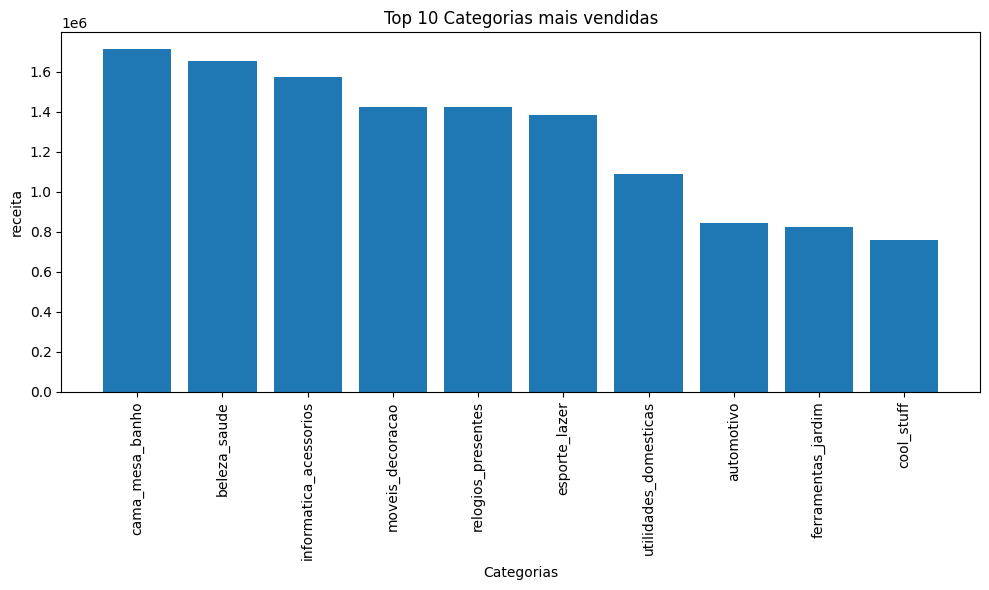

In [45]:

top_10_categ = receita_por_categoria.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_categ.index, top_10_categ.values)
plt.xticks(rotation=90)
plt.xlabel('Categorias')
plt.ylabel('receita')
plt.title('Top 10 Categorias mais vendidas')
plt.tight_layout()
plt.show()

---
Decisões estratégicas baseadas nos resultados

***Insight princial:***  planeja-se buscar assegurar alta disponibilidade de estoque em categorias-chave (top 10) e manter uma cadeia de suprimentos eficiente são essenciais para maximizar lucros, atendendo à demanda dos clientes, aumentando a satisfação, fidelidade e vendas para um crescimento saudável e sustentável a longo praazo para o negócio.


1. **Garantir Alta Disponibilidade de Estoque:**

  É essencial assegurar uma alta disponibilidade de estoque nessas categorias. Isso implica em manter níveis de estoque adequados, garantir uma cadeia de suprimentos eficiente e buscar parcerias estratégicas com fornecedores para garantir que os produtos estejam sempre disponíveis para compra.

2. **Maximização dos Lucros Através da Satisfação do Cliente:**

  Ao garantir a disponibilidade contínua dessas categorias de produtos, a empresa poderá maximizar os lucros, uma vez que atenderá à alta demanda dos clientes. Isso contribuirá para a satisfação do cliente, fidelização e aumento das vendas, resultando em um crescimento saudável do negócio.

---
Métrica

Disponibilidade de produtos 20% maiores das categorias populares por mês

In [46]:
receita_por_categoria

product_category_name
cama_mesa_banho                  1711258.08
beleza_saude                     1653730.45
informatica_acessorios           1571543.81
moveis_decoracao                 1424782.52
relogios_presentes               1421715.28
                                    ...    
pc_gamer                            1925.01
casa_conforto_2                     1710.54
cds_dvds_musicais                   1199.43
fashion_roupa_infanto_juvenil        785.67
seguros_e_servicos                   324.51
Name: payment_value, Length: 73, dtype: float64

In [47]:
receita_por_categoria_métrica = receita_por_categoria_métrica['product_category_name'].value_counts(
)

In [48]:
(receita_por_categoria_métrica / 12) * 1.2

product_category_name
cama_mesa_banho                                  1182.3
beleza_saude                                      997.2
esporte_lazer                                     894.5
moveis_decoracao                                  874.4
informatica_acessorios                            808.2
                                                  ...  
portateis_cozinha_e_preparadores_de_alimentos       1.5
cds_dvds_musicais                                   1.4
pc_gamer                                            1.0
fashion_roupa_infanto_juvenil                       0.8
seguros_e_servicos                                  0.2
Name: count, Length: 73, dtype: float64

# 📅 **Meses de Maior Volume de Vendas**: Em quais meses ocorreram as maiores quantidades de vendas?

---
Encontrando os valores

In [49]:
df_orders.order_purchase_timestamp = pd.to_datetime(
    df_orders.order_purchase_timestamp)

In [50]:
df_orders['month'] = df_orders.order_purchase_timestamp.dt.month

In [51]:
mapa = {1: 'Jan',
        2: 'Fev',
        3: 'Mar',
        4: 'Abr',
        5: 'Mai',
        6: 'Jun',
        7: 'Jul',
        8: 'Ago',
        9: 'Set',
        10: 'Out',
        11: 'Nov',
        12: 'Dez'}

In [52]:
df_orders.month = df_orders.month.map(mapa)

In [53]:
vendas_por_mês = df_orders.month.value_counts()

In [54]:
vendas_por_mês = vendas_por_mês.reindex(mapa.values())

In [55]:
top_3_meses = [mês for mês in vendas_por_mês.sort_values(
    ascending=False).head(3).index]
top_3_meses

['Ago', 'Mai', 'Jul']

---
Plot

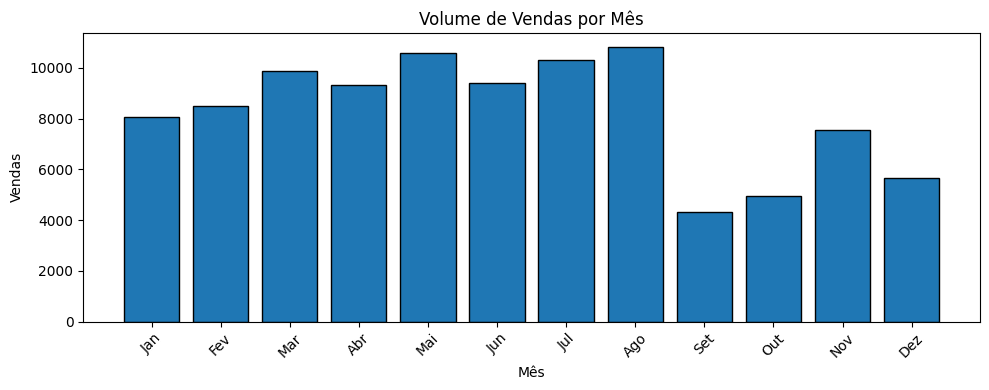

In [56]:
plt.figure(figsize=(HEIGHT, WIDTH))
plt.bar(vendas_por_mês.index, vendas_por_mês.values, edgecolor='black')
plt.title('Volume de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
Decisões estratégicas baseadas nos resultados

***Insight principal:*** deve-se priorizar investimentos em logística e infraestrutura nos meses de maior venda—agosto, maio e julho—e ajustar estratégias conforme a sazonalidade detectada melhora a experiência de compra, otimiza operações e maximiza vendas, alavancando o desempenho no primeiro semestre.

**1**. **Priorização do Investimento nos Meses de Agosto, Maio e Julho:**

  Com base na análise dos dados, recomenda-se que a empresa priorize o investimento em logística e infraestrutura de vendas nos meses de agosto, maio e julho. Esses meses apresentam os maiores volumes de vendas, indicando uma demanda significativa por produtos. Ao investir em logística e infraestrutura durante esses períodos de alta demanda, a empresa pode garantir uma experiência de compra satisfatória para os clientes, além de otimizar a eficiência operacional.

2. **Análise do Desempenho por Semestre:**

  Observou-se uma tendência de que as vendas no primeiro semestre são maiores em relação às do segundo semestre. Essa análise sugere a importância de compreender os padrões sazonais e de consumo ao longo do ano. Com essa compreensão, a empresa pode ajustar suas estratégias de marketing, promoção e estoque para maximizar as vendas durante os períodos de maior demanda e otimizar os recursos durante os períodos de menor demanda.

---
Métrica

O volume de vendas por mês a partir da implementação das decisões sugeridas

In [57]:
vendas_por_mês.sort_values(ascending=False)

month
Ago    10843
Mai    10573
Jul    10318
Mar     9893
Jun     9412
Abr     9343
Fev     8508
Jan     8069
Nov     7544
Dez     5674
Out     4959
Set     4305
Name: count, dtype: int64

In [58]:
df_orders['year'] = df_orders.order_purchase_timestamp.dt.year

In [59]:
métrica_vendas_por_mês_2025 = df_orders[df_orders.year == 2025].month.value_counts(
)
métrica_vendas_por_mês_2025

Series([], Name: count, dtype: int64)

# 🗺️ **Localização dos Clientes**: quais as regioes com menor predominancia de pedidos da empresa?

---
Encontrando os valores

In [60]:
localização_dos_clientes = pd.merge(
    df_orders, df_customers, on='customer_id', how='inner')

In [61]:
localização_dos_clientes.rename(
    columns={'customer_zip_code_prefix': 'geolocation_zip_code_prefix'}, inplace=True)

In [62]:
localização_dos_clientes = pd.merge(
    localização_dos_clientes, df_geolocation, on='geolocation_zip_code_prefix', how='inner')

In [63]:
métrica_localização_dos_clientes = localização_dos_clientes.copy()

In [64]:
colunas = ['geolocation_lat', 'geolocation_lng']

localização_dos_clientes = localização_dos_clientes[colunas]

---
Plot

<Axes: xlabel='geolocation_lng', ylabel='geolocation_lat'>

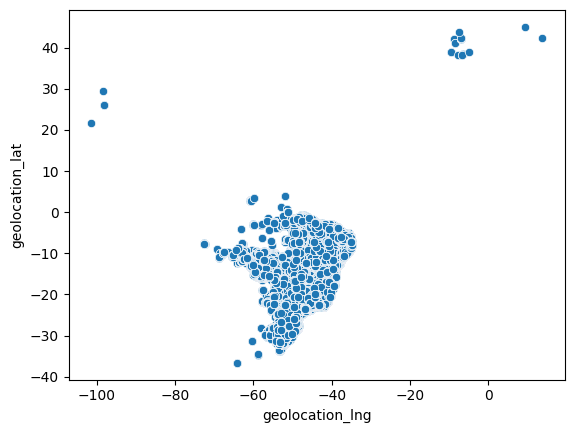

In [65]:
sns.scatterplot(x=localização_dos_clientes.geolocation_lng,
                y=localização_dos_clientes.geolocation_lat)

---
Decisões estratégicas baseadas nos resultados

***Insight principal:*** deve-se explorar novos mercados internacionais e investir em expansão e marketing no Norte, haja vista que a empresa possui baixa predominancia, do país são estratégias chave para diversificar a presença da empresa, adaptar produtos às necessidades locais, e atrair novos clientes através de campanhas e parcerias regionais.

1. **Exploração de Novos Mercados Internacionais:**

  Embora a presença internacional atual possa ser limitada, a empresa pode explorar oportunidades de expansão para outros mercados internacionais. Isso pode envolver a identificação de mercados-alvo promissores, adaptação dos produtos às necessidades locais e desenvolvimento de estratégias de entrada no mercado.

2. Investimento em Marketing e Expansão no Norte do País:

  Dada a presença limitada no Norte do país, a empresa pode optar por investir em marketing direcionado e expansão de negócios nessa região. Isso pode incluir campanhas publicitárias regionais, parcerias com empresas locais e oferta de promoções específicas para atrair clientes do Norte.

---
Métrica

O volume de vendas por região a partir da implementação das decisões

In [66]:
localização_dos_clientes

,geolocation_lat,geolocation_lng
0,-23.574809,-46.587471
1,-23.578333,-46.587123
2,-23.574809,-46.587471
3,-23.575033,-46.587451
4,-23.580054,-46.586673
...,...,...
15083450,-17.907792,-39.374387
15083451,-17.898294,-39.371730
15083452,-17.890630,-39.368081
15083453,-17.912151,-39.389831


In [67]:
região_norte = ['AM', 'PA', 'AC', 'RR', 'RO', 'AP', 'TO']

In [68]:
colunas = ['geolocation_lat', 'geolocation_lng', 'year']

In [69]:
métrica_localização_dos_clientes = métrica_localização_dos_clientes[(métrica_localização_dos_clientes['year'] == 2025) & (
    métrica_localização_dos_clientes['customer_state'].isin(região_norte))]

In [70]:
métrica_localização_dos_clientes = métrica_localização_dos_clientes[colunas]
métrica_localização_dos_clientes

,geolocation_lat,geolocation_lng,year
